The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Hours Studied: The total number of hours spent studying by each student. 
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.

We will see how much the feature affect the Performance Index and try to predict Performance Index value using these features with linear regression model .

# Import libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')


In [25]:
data = pd.read_csv('Student_Performance.csv')
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [27]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Dealing with missing data and duplicated data 

In [28]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

There is no missing data 

In [29]:
data.duplicated().sum()

127

drop the duplicated data

In [30]:
data.drop_duplicates(inplace = True)

/tmp/ipykernel_3768/1280136612.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Previous Scores'])
/tmp/ipykernel_3768/1280136612.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Performance Index'])


<Axes: xlabel='Performance Index', ylabel='Density'>

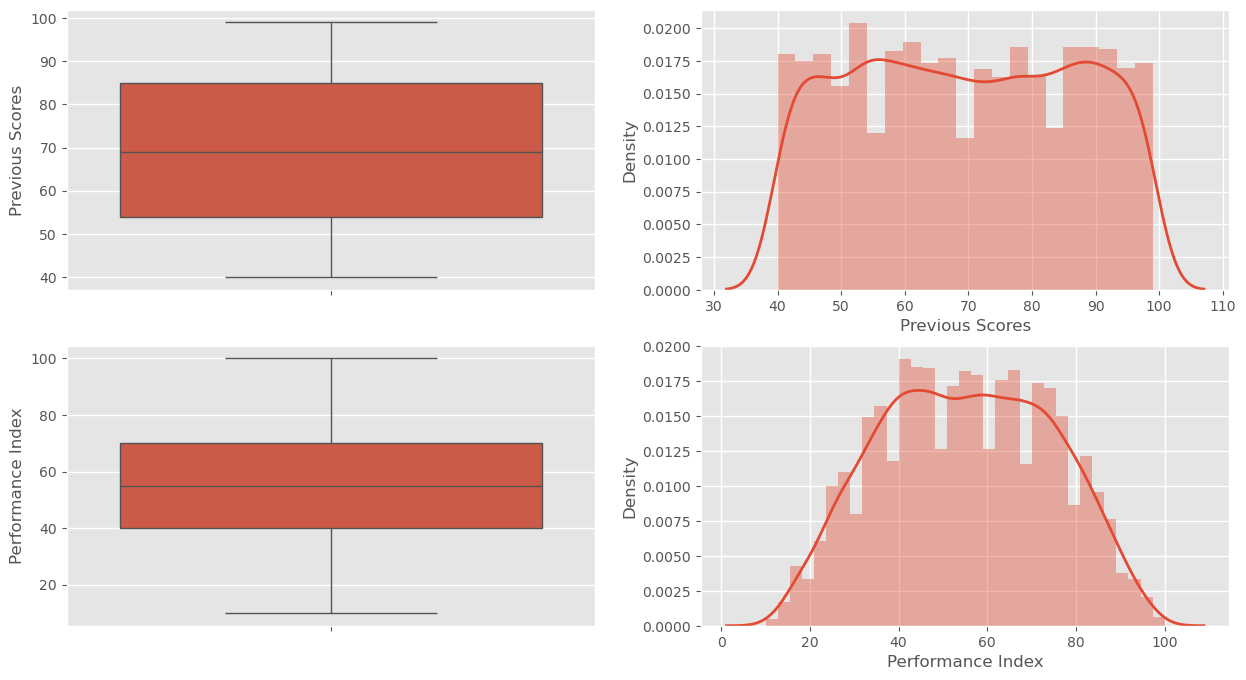

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(data['Previous Scores'])
plt.subplot(2,2,2)
sns.distplot(data['Previous Scores'])

plt.subplot(2,2,3)
sns.boxplot(data['Performance Index'])
plt.subplot(2,2,4)
sns.distplot(data['Performance Index'])


We dont have outliers and they are normally distrubuted

# Visualize some data to better understand

In [32]:
sum_activ = data['Extracurricular Activities'].value_counts()
print(sum_activ)

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Extracurricular Activities'>

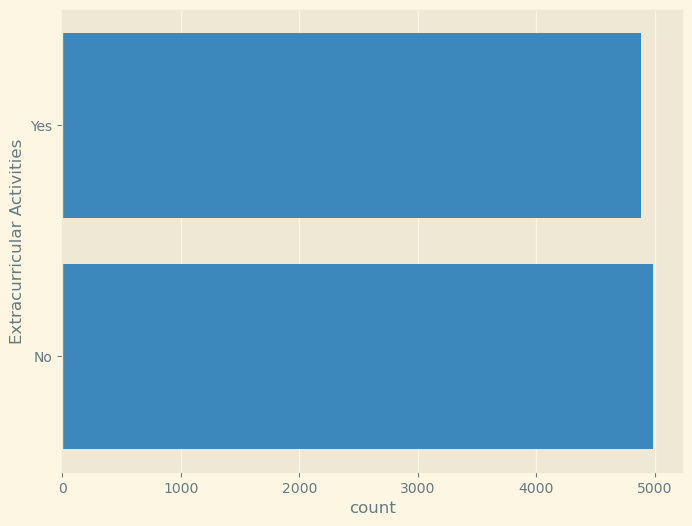

In [33]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(8,6))
sns.countplot(data['Extracurricular Activities'])

In [34]:
data['Extracurricular Activities'].replace({'Yes' : 1 , 'No': 0}, inplace=True)

/tmp/ipykernel_3768/469635605.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Extracurricular Activities'].replace({'Yes' : 1 , 'No': 0}, inplace=True)
/tmp/ipykernel_3768/469635605.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Extracurricular Activities'].replace({'Yes' : 1 , 

# See the correlation and visualize it 

<Axes: >

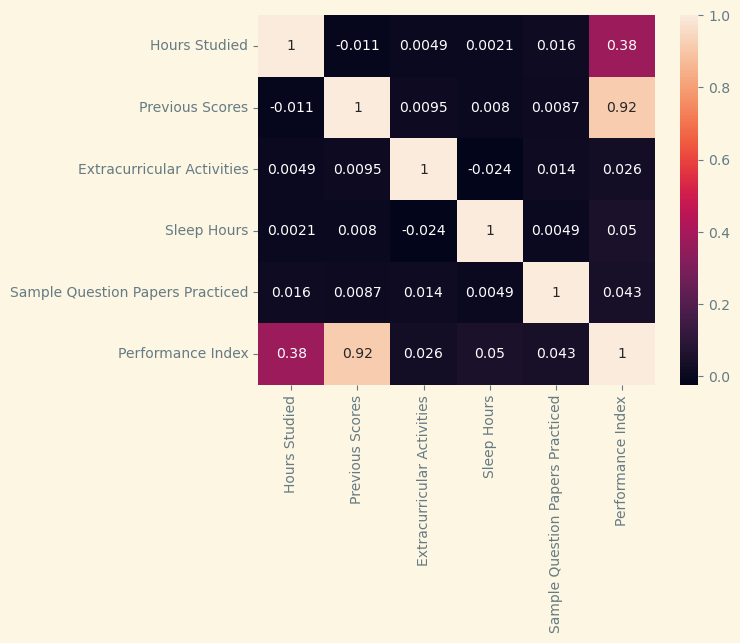

In [35]:

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot= True)

# Determin the independent data and the dependent(Target) data 

In [36]:
X = data.drop('Performance Index',axis=1)
Y = data['Performance Index']

# Split the data

In [39]:
x_train , x_test , y_train , y_test = train_test_split(X,Y ,test_size=0.3, random_state=2)

# Linear Regression Model Using Pipe

In [47]:
# lr = LinearRegression()
Ipt = [('scale', StandardScaler()),('linear',LinearRegression())]
pipe = Pipeline(Ipt)



pipe.fit(x_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('linear', LinearRegression())])

In [49]:
prediction = pipe.predict(x_test)

In [80]:
# scaling_factors = pipe.named_steps['scale'].scale_
# coefficients = pipe.named_steps['linear'].coef_ / scaling_factors
coefficients = pipe.named_steps['linear'].coef_

# Get the coefficients

In [81]:
for i, j in zip(coefficients, X.columns) :
    print(f" the coefficient of ({j}) is {i}")

 the coefficient of (Hours Studied) is 7.370077343103731
 the coefficient of (Previous Scores) is 17.65699621754911
 the coefficient of (Extracurricular Activities) is 0.2889424808346906
 the coefficient of (Sleep Hours) is 0.8058069570265299
 the coefficient of (Sample Question Papers Practiced) is 0.5589952479450384


# Evaluate the model using different metrics

/tmp/ipykernel_3768/4072977936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test , hist=False , label='actual value', color='red')
/tmp/ipykernel_3768/4072977936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction , ax = ax1 , hist = False , label='pre

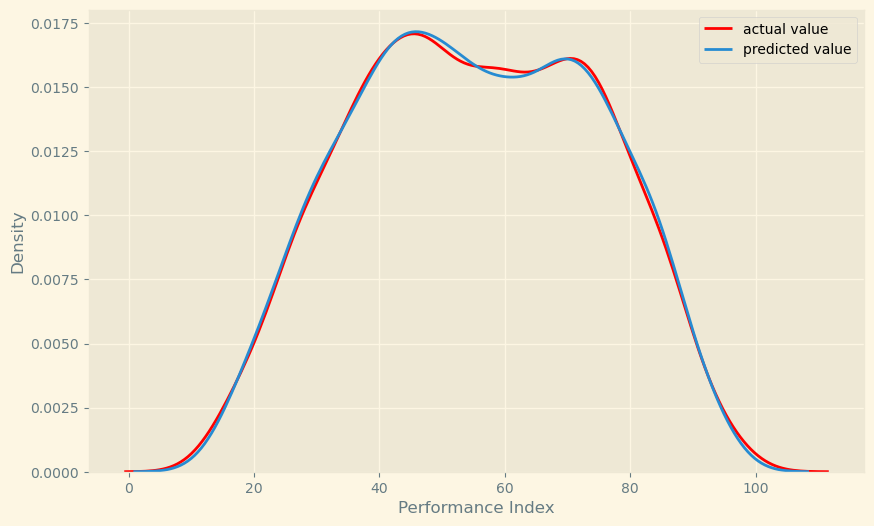

In [67]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y_test , hist=False , label='actual value', color='red')
sns.distplot(prediction , ax = ax1 , hist = False , label='predicted value')
plt.legend()
plt.show()

In [68]:
r2_sc = r2_score(y_test , prediction)

MSE = mean_squared_error(y_test , prediction)

MAE = mean_absolute_error(y_test , prediction)

In [69]:
print('the r2_score of the model is ',r2_sc)
print('the MSE of the model is ',MSE)
print('the MAE of the model is ',MAE)

the r2_score of the model is  0.9892248179772213
the MSE of the model is  3.999289724256716
the MAE of the model is  1.5870651406520635
